In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

In [51]:
titanic=pd.read_csv('/content/drive/MyDrive/Enhance it/Project 4/TitanicPreprocessed.csv')
churn=pd.read_csv('/content/drive/MyDrive/Enhance it/Project 4/Churn_Modelling.csv')
cirrhosis2=pd.read_csv('/content/drive/MyDrive/Enhance it/Project 4/Cirrhosis.csv')
cirrhosis=cirrhosis2.copy()


In [52]:
cirrhosis=cirrhosis.drop('index',axis=1)

## Activation functions

In [53]:
def one_hot_encode(y):
  N=len(y)
  K=len(set(y))

  Y=np.zeros((N,K))

  for i in range(N):
    Y[i, y[i]]=1
  return Y



def sigmoid(h):
  return 1/(1+np.exp(-h))

def ReLU(H):
  return H*(H>0)

def softmax(H):
  eH=np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

def linear(H):
  return H

def derivative(Z,a):

  if a == linear:
    return 1

  elif a == sigmoid:
    return Z*(1-Z)

  elif a == ReLU:
    return (Z>0).astype(int)

  elif a== np.tanh:
    return 1-Z*Z
    
  else: 
    ValueError("Unknown Activation Function")









## Models and useful functions

In [54]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

In [55]:
def bin_cross_entropy(y, p_hat):
  return(-(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))  )

In [56]:
def accuracy(y, y_hat):
  return(np.mean(y==y_hat))

def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h), axis=1)).T

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)

def OLS(Y, Y_hat):
  return(1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

def inidices_to_one_hot(data, nb_classes):
  targets=np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]

In [57]:
class SimpleLogisticRegression():
  def __init__(self, thresh=0.5):
    self.thresh=thresh
    self.W=None
    self.B=None

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs=int(epochs)
    N, D =X.shape

    self.W=np.random.randn(D)
    self.B=np.random.randn(1)

    J=np.zeros(epochs)

    for epoch in range(epochs):

      p_hat=self.__forward__(X)
      J[epoch]=bin_cross_entropy(y, p_hat)

      #Weight and Bias Updates
      self.W-=eta*(1/N)*X.T@(p_hat-y)
      self.B-= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel("$\mathcal{J}$")
      plt.title('Training Curve')
    return(self.W, self.B)

  def __forward__(self,X):
    return sigmoid(X@self.W+self.B)

  def predict(self, X):
    return(self.__forward__(X)>=self.thresh).astype(np.int32)

In [58]:
def main():
  N=1000
  D=2

  X0=np.random.randn(N//2, D)+np.array([1,1])
  X1=np.random.randn((N//2), D)+np.array([-1,-1])
  X=np.vstack((X0,X1))

  y=np.array([0]*(N//2)+[1]*(N//2))

  plt.figure()

  plt.scatter(X[:,0], X[:,1],c=y, alpha=0.5, s=8)

  log_reg=SimpleLogisticRegression()
  log_reg.fit(X, y, eta=1e-1, show_curve=True )
  y_hat=log_reg.predict(X)

  print(f'Training Accuracy: {accuracy(y, y_hat):0.4f}')
  

  
  
  x1=np.linspace(X[:,0].min()-1, X[:,0].max()+1,1000)
  
  x2=-(log_reg.B/log_reg.W[1])-(log_reg.W[0]/log_reg.W[1])*x1
  

  plt.figure()

  plt.scatter(X[:,0], X[:,1],c=y_hat, alpha=0.5, s=8)
  plt.plot(x1,x2, color='000000', linewidth=2)


  #X1=np.linspace(X[:0,].min()-1, X[:,0].max()+1,)

In [59]:
class MVLogisticRegression():

  def __init__(self, thresh=0.5):
    self.thresh=thresh

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape
    K = len(np.unique(y))
    y_values=np.unique(y, return_index=False)
    Y = inidices_to_one_hot(y, K).astype(int)

    #Stochastic Initialization of Weights and Biases
    self.W = np. random.randn(D, K)
    self.B = np.random.randn(N, K)

    J=np.zeros(int(epochs))
    

    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch]=cross_entropy(Y, P_hat)

      #Weight annd bias update Rule

      self.W-=eta*(1/N)*X.T@(P_hat-Y)
      self.B-=eta*(1/N)*np.sum(P_hat-Y, axis=0)
    
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel("$\mathcal{J}$")
      plt.title('Training Curve')

  def __forward__(self, X):
    return softmax(X@self.W+self.B)

  def predict(self, X):
    return np.argmax(self.__forward__(X), axis=1)


In [60]:
class Shallow_ANN():

  def fit(self, X, y, neurons=10, eta=1e-3, epochs=1e3, show_curve=False):
    epochs= int(epochs)
    Y = one_hot_encode(y)

    N,D=X.shape

    K=Y.shape[1]

    self.W={l:np.random.randn(M[0], M[1]) for l , M in enumerate(zip([D, neurons], [neurons,K]),1 )}
    self.b={l:np.random.randn(M) for l , M in enumerate([neurons, K],1)}


    self.a={1:np.tanh, 2:softmax}

    J=np.zeros(epochs)

    for epoch in range(epochs):

      self.__forward__(X)
      J[epoch]=cross_entropy(Y, self.Z[2])

      #Weight Update rule:
      self.W[2]-=eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))

      #Bias update

      self.b[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
      self.b[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel('epochs')
        plt.ylabel("$\mathcal{J}$")
        plt.title('Training Curve')

  def __forward__(self, X):
    self.Z={0:X}

    for l in sorted(self.W.keys()):
      self.Z[l]=self.a[l](self.Z[l-1]@self.W[l]+self.b[l])

  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

In [61]:
class Shallow_ANN():

  def fit(self, X, y, neurons =10, eta = 1e-3, epochs=1e3, show_curve= False):
    epochs = int(epochs)
    Y = one_hot_encode(y)


    N,D = X.shape
    K = Y.shape[1]

    self.W = {l: np.random.randn(M[0],M[1]) for l , M in enumerate(zip([D, neurons], [neurons, K]),1)}
    self.b = {l: np.random.randn(M) for l, M in enumerate([neurons, K],1)}

    self.a={1:np.tanh, 2:softmax}

    J = np.zeros(epochs)

    for epoch in range(epochs):

      self.__forward__(X)
      J[epoch] = cross_entropy(Y, self.Z[2])

      #Weight Update rule:
      self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2] - Y)
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      #Bias Update rule:
      self.b[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
      self.b[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)
      
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")

  def __forward__(self, X):
    self.Z ={0:X}

    for l in sorted (self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.b[l])

  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

In [62]:
def main():
  D=2
  K=3
  N=int(K*1e3)

  X0 = np.random.randn((N//K),D) +np.array([2,2])
  X1 = np.random.randn((N//K),D) +np.array([0,-2])
  X2 = np.random.randn((N//K),D) +np.array([-2,2])
  X = np.vstack((X0,X1,X2))

  y= np.array([0]*(N//K)+[1]*(N//K)+[2]*(N//K))

  x1 = np.linspace(X[:,0].min() - 1, X[:,0].max()+1 , 1000)
  x2 = np.linspace(X[:,1].min() - 1, X[:,1].max()+1 , 1000)

  xx1,xx2 = np.meshgrid(x1,x2)

  ann = Shallow_ANN()
  ann.fit(X,y,neurons=20, eta=4e-3, epochs=6e3, show_curve=True)
  y_hat =ann.predict(X)

  print(f"Training Accuracy: {accuracy(y,y_hat):0.4f}")

  plt.figure()
  plt.scatter(X[:,0], X[:,1], c=y, s=6)

  Z = ann. predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)

  plt.figure()
  plt.pcolormesh(xx1,xx2,Z,cmap=cmap_light)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()

In [63]:
class ANN():
  def __init__(self,architecture,activations = None, mode=0):

    self.mode = mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture)+1

  def fit(self, X, y,eta=1e-3, epochs=1e3,show_curve=False):

    epochs = int(epochs)
    if self.mode:
      Y=y
    else:
      Y = one_hot_encode(y)
    N,D = X.shape
    K = Y.shape[1]
    #Initialize Weights and Biases
    self.W ={l: np.random.randn(M[0],M[1]) for l,M in
            enumerate(zip(([D]+self.architecture),(self.architecture+[K])),1)}
    self.b = {l:np.random.randn(M) for l, M in enumerate(self.architecture+[K],1)}

    ## Activation Function Loading
    if self.activations is None:
      self.a ={l:ReLU for l in range(1,self.L)}
    else:
      self.a ={l:act for l,act in enumerate(self.activations,1)}
    # Set Mode
    if self.mode:
      self.a[self.L] = linear
    else:
      self.a[self.L] = softmax
    
    J = np.zeros(epochs)

    for epoch in range(epochs):

      self.__forward__(X)

      if self.mode:
        J[epoch] = OLS(Y,self.Z[self.L])
      else:
        J[epoch] = cross_entropy(Y,self.Z[self.L])

      dH =(1/N) *(self.Z[self.L]-Y)

      for l in sorted(self.W.keys(), reverse=True):
        dW = self.Z[l-1].T@dH
        db = dH.sum(axis=0)
        # Weights and bias update rule
        self.W[l] -= eta*dW
        self.b[l] -= eta*db
        if l>1:
          dZ = dH@self.W[l].T
          dH = dZ * derivative(self.Z[l-1],self.a[l-1])
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel('$\mathcal{J}$')
      plt.title('Trainig curve')
      plt.show()
  def __forward__(self,X):
    self.Z = {0:X}

    for l in sorted (self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.b[l])
  
  def predict (self,X):
    self.__forward__(X)

    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)

## Attribute Information

1. `ID`: unique identifier
1. `N_Days`: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
1. `Status`: status of the patient C (censored), CL (censored due to liver tx), or D (death)
1. `Drug:` type of drug D-penicillamine or placebo
1. `Age:` age in [days]
1. `Sex`: M (male) or F (female)
1. `Ascites:` presence of ascites N (No) or Y (Yes)
1. `Hepatomegaly:` presence of hepatomegaly N (No) or Y (Yes)
1. `Spiders:` presence of spiders N (No) or Y (Yes)
1. `Edema:` presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
1. `Bilirubin:` serum bilirubin in [mg/dl]
1. `Cholesterol:` serum cholesterol in [mg/dl]
1. `Albumin:` albumin in [gm/dl]
1. `Copper:` urine copper in [ug/day]
1. `Alk_Phos:` alkaline phosphatase in [U/liter]
1. `SGOT:` SGOT in [U/ml]
1. `Triglycerides:` triglicerides in [mg/dl]
1. `Platelets:` platelets per cubic [ml/1000]
1. `Prothrombin:` prothrombin time in seconds [s]
1. `Stage:` histologic stage of disease (1, 2, 3, or 4)

## Exploratory Data Analysis

In [64]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   duration       312 non-null    int64  
 1   status         312 non-null    int64  
 2   drug           312 non-null    int64  
 3   age            312 non-null    int64  
 4   sex            312 non-null    int64  
 5   ascites        312 non-null    int64  
 6   hepatomology   312 non-null    int64  
 7   spiders        312 non-null    int64  
 8   edema          312 non-null    float64
 9   bilirubin      312 non-null    float64
 10  cholesterol    284 non-null    float64
 11  albumin        312 non-null    float64
 12  copper         310 non-null    float64
 13  phosphatase    312 non-null    float64
 14  SGOT           312 non-null    float64
 15  triglicerides  282 non-null    float64
 16  platelets      308 non-null    float64
 17  prothrombin    312 non-null    float64
 18  stage     

In [65]:
cirrhosis.describe(include='all')

,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,284.000000,312.000000,310.000000,312.000000,312.000000,282.000000,308.000000,312.000000,312.000000
mean,2006.362179,0.862179,1.493590,18269.442308,0.884615,0.076923,0.512821,0.288462,0.110577,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641,3.032051
std,1123.280843,0.960764,0.500762,3864.805407,0.319999,0.266897,0.500639,0.453775,0.274507,4.530315,231.944545,0.419892,85.613920,2140.388824,56.699525,65.148639,95.608742,1.004323,0.877880
min,41.000000,0.000000,1.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1191.000000,0.000000,1.000000,15427.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000,249.500000,3.310000,41.250000,871.500000,80.600000,84.250000,199.750000,10.000000,2.000000
50%,1839.500000,0.000000,1.000000,18187.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.350000,309.500000,3.550000,73.000000,1259.000000,114.700000,108.000000,257.000000,10.600000,3.000000
75%,2697.250000,2.000000,2.000000,20715.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.425000,400.000000,3.800000,123.000000,1980.000000,151.900000,151.000000,322.500000,11.100000,4.000000
max,4556.000000,2.000000,2.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


### Nan values


In [66]:
cirrhosis.isna().sum()

duration          0
status            0
drug              0
age               0
sex               0
ascites           0
hepatomology      0
spiders           0
edema             0
bilirubin         0
cholesterol      28
albumin           0
copper            2
phosphatase       0
SGOT              0
triglicerides    30
platelets         4
prothrombin       0
stage             0
dtype: int64

* We have some `nan` values . We will imputate the values because we have few data

In [67]:
mean_triglicerides=cirrhosis._convert(numeric=True)["triglicerides"].describe()["mean"]
median_triglicerides=cirrhosis._convert(numeric=True)["triglicerides"].describe()['50%']

In [68]:
mean_triglicerides,median_triglicerides

(124.70212765957447, 108.0)

In [69]:
cirrhosis['triglicerides'].fillna(cirrhosis['triglicerides'].median(), inplace=True)

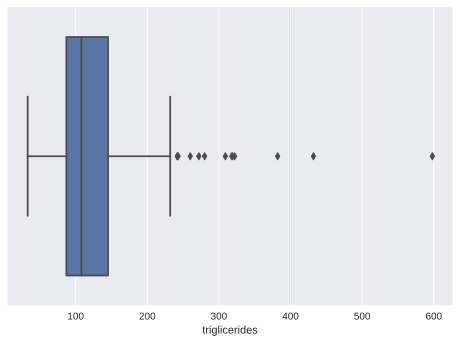

In [70]:
sns.boxplot(x='triglicerides', data=cirrhosis);

### Cholesterol

In [71]:
mean_cholesterol=cirrhosis._convert(numeric=True)["cholesterol"].describe()["mean"]
median_cholesterol=cirrhosis._convert(numeric=True)["cholesterol"].describe()['50%']

In [72]:
mean_cholesterol,median_cholesterol

(369.51056338028167, 309.5)

In [73]:
cirrhosis['cholesterol'].fillna(cirrhosis['cholesterol'].mean(), inplace=True)

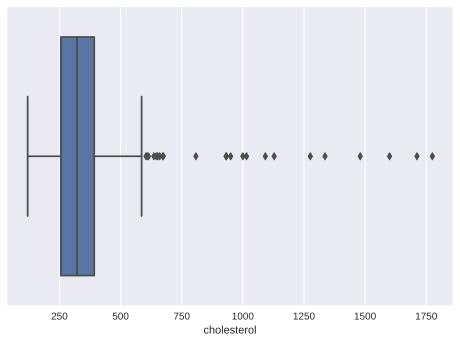

In [74]:
sns.boxplot(x='cholesterol', data=cirrhosis);

###  Plattelets

In [75]:
mean_platelets=cirrhosis._convert(numeric=True)["platelets"].describe()["mean"]
median_platelets=cirrhosis._convert(numeric=True)["platelets"].describe()['50%']

In [76]:
mean_platelets,median_platelets

(261.93506493506493, 257.0)

In [77]:
cirrhosis['platelets'].fillna(cirrhosis['platelets'].mean(), inplace=True)

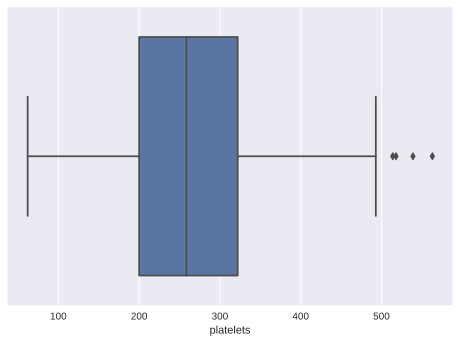

In [78]:
sns.boxplot(x='platelets', data=cirrhosis);

### Copper


In [79]:
mean_copper=cirrhosis._convert(numeric=True)["copper"].describe()["mean"]
median_copper=cirrhosis._convert(numeric=True)["copper"].describe()['50%']

In [80]:
mean_copper,median_copper

(97.64838709677419, 73.0)

In [81]:
cirrhosis['copper'].fillna(cirrhosis['copper'].mean(), inplace=True)

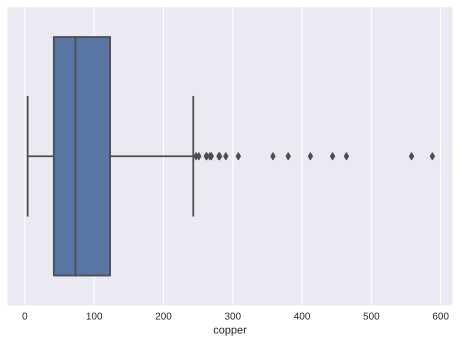

In [82]:
sns.boxplot(x='copper', data=cirrhosis);

In [83]:
cirrhosis.isna().sum()

duration         0
status           0
drug             0
age              0
sex              0
ascites          0
hepatomology     0
spiders          0
edema            0
bilirubin        0
cholesterol      0
albumin          0
copper           0
phosphatase      0
SGOT             0
triglicerides    0
platelets        0
prothrombin      0
stage            0
dtype: int64

In [84]:
dff=cirrhosis.copy()

In [85]:
dff.drop(["status", "duration", "drug"], axis=1)

,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,22347,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,21294,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,22767,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,13879,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [86]:
dff.corr()

,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
duration,1.000000,-0.423514,-0.008362,-0.133682,0.019868,-0.307135,-0.288141,-0.266402,-0.352036,-0.441793,-0.130596,0.435849,-0.364148,0.149269,-0.225492,-0.147093,0.190822,-0.168299,-0.371641
status,-0.423514,1.000000,-0.025234,0.201685,-0.166936,0.317345,0.334591,0.231614,0.320095,0.436755,0.178539,-0.310052,0.386915,0.225822,0.294376,0.201924,-0.148279,0.405888,0.344549
drug,-0.008362,-0.025234,1.000000,-0.134242,0.055567,-0.044415,0.102935,0.008164,-0.012370,0.085697,0.018268,0.009022,0.000060,-0.018316,0.042007,0.014697,0.033586,0.073213,0.066298
age,-0.133682,0.201685,-0.134242,1.000000,-0.211373,0.231841,0.075368,-0.050147,0.220166,0.038601,-0.149287,-0.195264,0.061299,-0.047247,-0.149869,0.019323,-0.138371,0.196300,0.168182
sex,0.019868,-0.166936,0.055567,-0.211373,1.000000,-0.008688,-0.050949,0.141379,-0.037309,0.030651,0.011211,-0.050972,-0.240045,-0.032161,0.003610,-0.056052,0.096549,-0.099819,-0.021131
ascites,-0.307135,0.317345,-0.044415,0.231841,-0.008688,1.000000,0.161045,0.161339,0.585731,0.378295,-0.054326,-0.389348,0.222219,0.010615,0.092264,0.183592,-0.215407,0.320098,0.250187
hepatomology,-0.288141,0.334591,0.102935,0.075368,-0.050949,0.161045,1.000000,0.295054,0.170979,0.301725,0.131350,-0.299190,0.233378,0.110236,0.136035,0.154420,-0.189032,0.187358,0.467293
spiders,-0.266402,0.231614,0.008164,-0.050147,0.141379,0.161339,0.295054,1.000000,0.272282,0.288349,0.059541,-0.233728,0.260253,0.037864,0.130724,0.090834,-0.160989,0.246182,0.291512
edema,-0.352036,0.320095,-0.012370,0.220166,-0.037309,0.585731,0.170979,0.272282,1.000000,0.404553,-0.100842,-0.401290,0.256395,0.023525,0.140674,0.073476,-0.232596,0.389726,0.252104
bilirubin,-0.441793,0.436755,0.085697,0.038601,0.030651,0.378295,0.301725,0.288349,0.404553,1.000000,0.380560,-0.334638,0.456512,0.116984,0.441730,0.418421,-0.086808,0.361742,0.241367


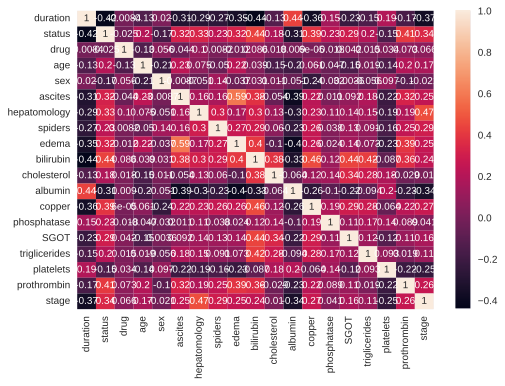

In [87]:
sns.heatmap(dff.corr(), annot=True)

In [88]:
cirrhosis.corr()

,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
duration,1.000000,-0.423514,-0.008362,-0.133682,0.019868,-0.307135,-0.288141,-0.266402,-0.352036,-0.441793,-0.130596,0.435849,-0.364148,0.149269,-0.225492,-0.147093,0.190822,-0.168299,-0.371641
status,-0.423514,1.000000,-0.025234,0.201685,-0.166936,0.317345,0.334591,0.231614,0.320095,0.436755,0.178539,-0.310052,0.386915,0.225822,0.294376,0.201924,-0.148279,0.405888,0.344549
drug,-0.008362,-0.025234,1.000000,-0.134242,0.055567,-0.044415,0.102935,0.008164,-0.012370,0.085697,0.018268,0.009022,0.000060,-0.018316,0.042007,0.014697,0.033586,0.073213,0.066298
age,-0.133682,0.201685,-0.134242,1.000000,-0.211373,0.231841,0.075368,-0.050147,0.220166,0.038601,-0.149287,-0.195264,0.061299,-0.047247,-0.149869,0.019323,-0.138371,0.196300,0.168182
sex,0.019868,-0.166936,0.055567,-0.211373,1.000000,-0.008688,-0.050949,0.141379,-0.037309,0.030651,0.011211,-0.050972,-0.240045,-0.032161,0.003610,-0.056052,0.096549,-0.099819,-0.021131
ascites,-0.307135,0.317345,-0.044415,0.231841,-0.008688,1.000000,0.161045,0.161339,0.585731,0.378295,-0.054326,-0.389348,0.222219,0.010615,0.092264,0.183592,-0.215407,0.320098,0.250187
hepatomology,-0.288141,0.334591,0.102935,0.075368,-0.050949,0.161045,1.000000,0.295054,0.170979,0.301725,0.131350,-0.299190,0.233378,0.110236,0.136035,0.154420,-0.189032,0.187358,0.467293
spiders,-0.266402,0.231614,0.008164,-0.050147,0.141379,0.161339,0.295054,1.000000,0.272282,0.288349,0.059541,-0.233728,0.260253,0.037864,0.130724,0.090834,-0.160989,0.246182,0.291512
edema,-0.352036,0.320095,-0.012370,0.220166,-0.037309,0.585731,0.170979,0.272282,1.000000,0.404553,-0.100842,-0.401290,0.256395,0.023525,0.140674,0.073476,-0.232596,0.389726,0.252104
bilirubin,-0.441793,0.436755,0.085697,0.038601,0.030651,0.378295,0.301725,0.288349,0.404553,1.000000,0.380560,-0.334638,0.456512,0.116984,0.441730,0.418421,-0.086808,0.361742,0.241367


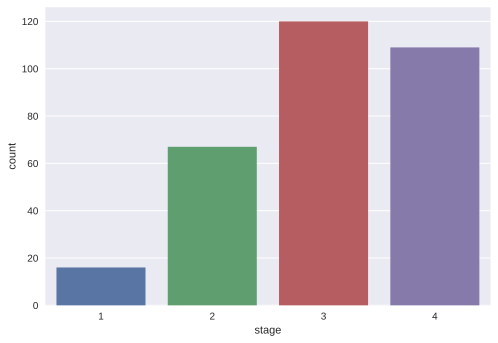

In [89]:
sns.countplot(x='stage', data=cirrhosis)

* We can see that our data is imbalanced, so we could have some problems when we will try to predict the classes. 

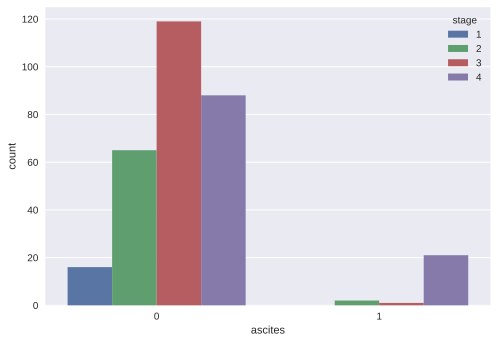

In [90]:
sns.countplot(x='ascites',hue='stage', data=cirrhosis,)

* In Stage 4, people get
ascites `Abnormal buildup of fluid in the abdomen that may cause swelling.`

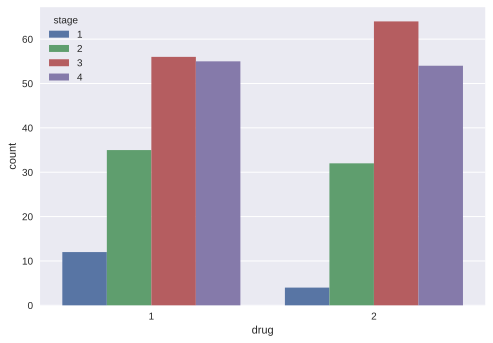

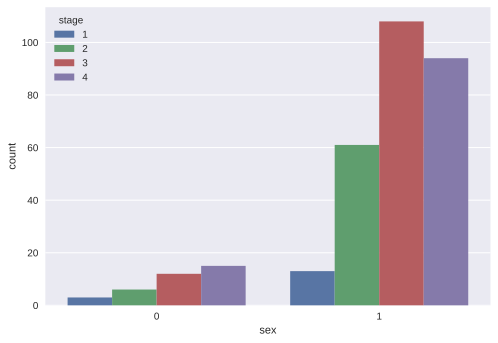

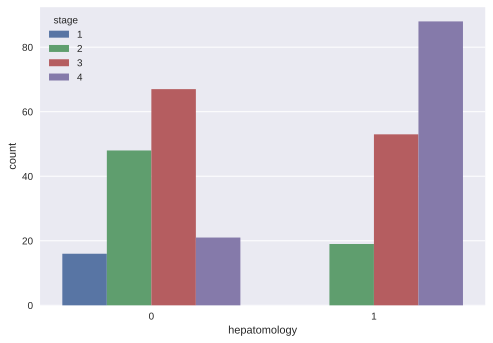

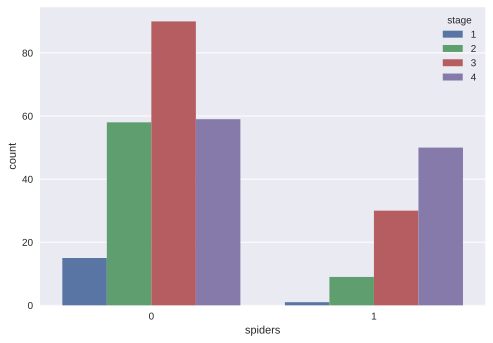

In [91]:
for i in ['drug', 'sex', 'hepatomology','spiders']:
  sns.countplot(x=i,hue='stage', data=cirrhosis)
  plt.show()

* In stage 1 people do not present heptamology, and we can see that in stage 4 people do present


`Hepatomeology`: abnormal enlargement of the liver.



---



---



---



In [92]:
cirrhosis.select_dtypes(include=['float']).columns

Index(['edema', 'bilirubin', 'cholesterol', 'albumin', 'copper', 'phosphatase',
       'SGOT', 'triglicerides', 'platelets', 'prothrombin'],
      dtype='object')

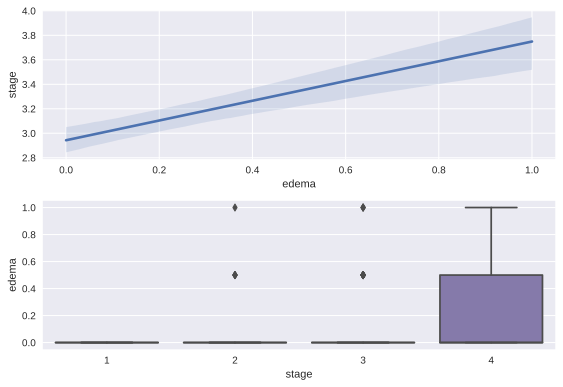

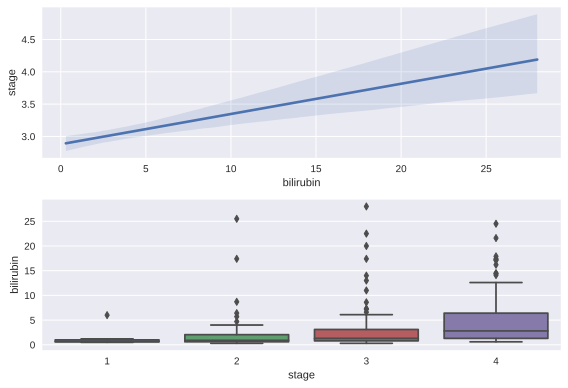

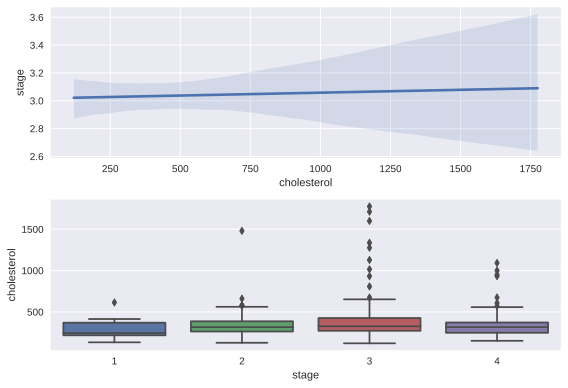

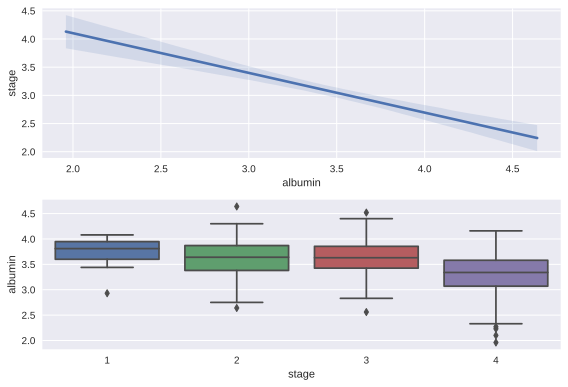

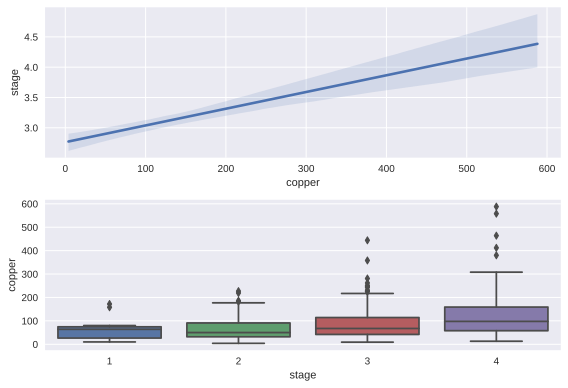

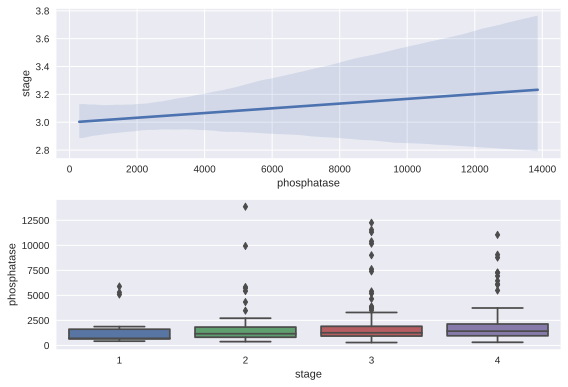

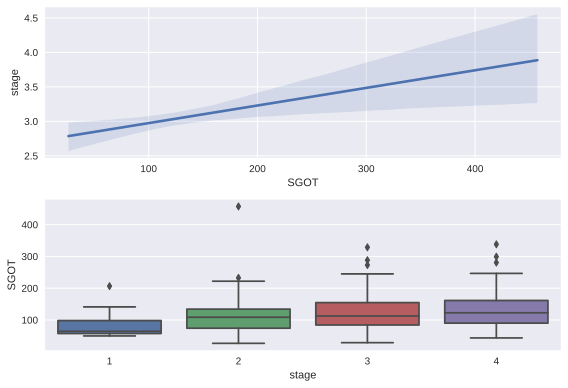

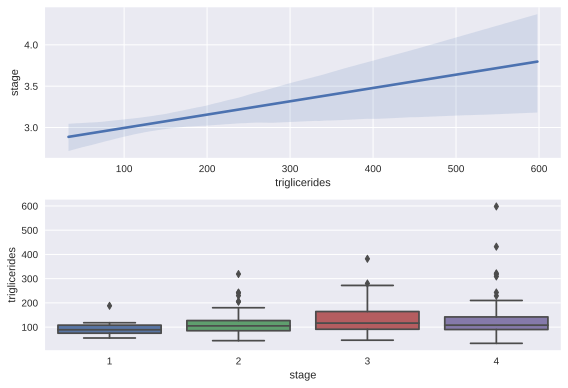

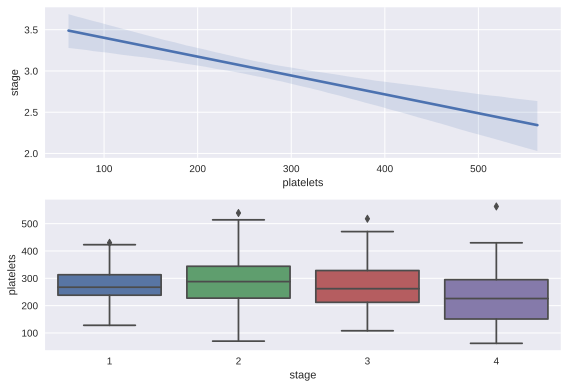

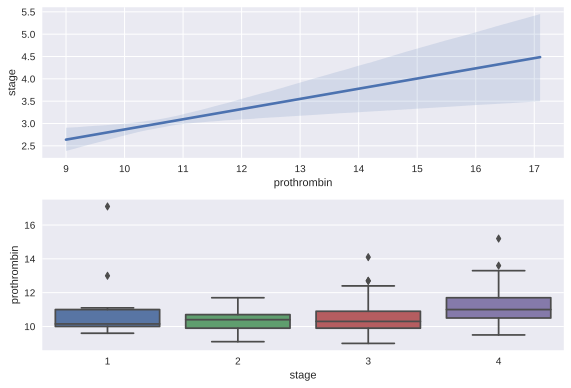

In [93]:
for i in ['edema', 'bilirubin', 'cholesterol', 'albumin',
       'copper', 'phosphatase', 'SGOT', 'triglicerides', 'platelets',
       'prothrombin']:
      plt.subplot(2,1,1)
      sns.regplot(x=i, y='stage', data=cirrhosis, logistic=False, scatter=False)
      plt.subplot(2,1,2)
      sns.boxplot(y=i, x='stage', data=cirrhosis)
      plt.tight_layout()
      plt.show()


In [94]:
cirrhosis.select_dtypes(include=['int64'])

,duration,status,drug,age,sex,ascites,hepatomology,spiders,stage
0,400,2,1,21464,1,1,1,1,4
1,4500,0,1,20617,1,0,1,1,3
2,1012,2,1,25594,0,0,0,0,4
3,1925,2,1,19994,1,0,1,1,4
4,1504,1,2,13918,1,0,1,1,3
...,...,...,...,...,...,...,...,...,...
307,1153,0,1,22347,1,0,1,0,2
308,994,0,2,21294,1,0,0,0,2
309,939,0,1,22767,1,0,0,0,2
310,839,0,1,13879,1,0,0,0,2


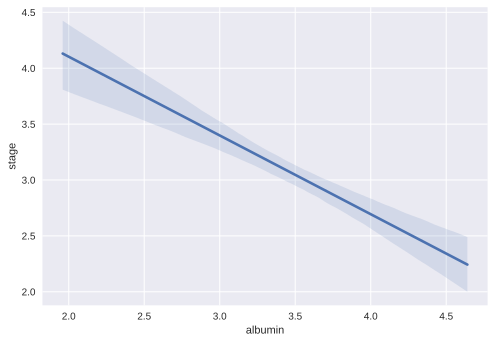

In [95]:
from seaborn.categorical import countplot
sns.regplot(x='albumin', y='stage', data=cirrhosis, logistic=False, scatter=False);

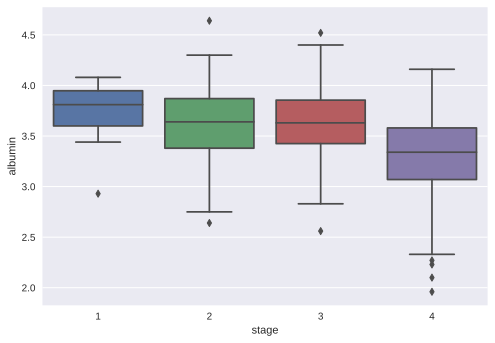

In [96]:
sns.boxplot(y='albumin', x='stage', data=cirrhosis)

In [97]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   duration       312 non-null    int64  
 1   status         312 non-null    int64  
 2   drug           312 non-null    int64  
 3   age            312 non-null    int64  
 4   sex            312 non-null    int64  
 5   ascites        312 non-null    int64  
 6   hepatomology   312 non-null    int64  
 7   spiders        312 non-null    int64  
 8   edema          312 non-null    float64
 9   bilirubin      312 non-null    float64
 10  cholesterol    312 non-null    float64
 11  albumin        312 non-null    float64
 12  copper         312 non-null    float64
 13  phosphatase    312 non-null    float64
 14  SGOT           312 non-null    float64
 15  triglicerides  312 non-null    float64
 16  platelets      312 non-null    float64
 17  prothrombin    312 non-null    float64
 18  stage     

In [98]:
set(cirrhosis.status)

{0, 1, 2}

## Preprocessing

In [99]:
cirrhosis['stage']=cirrhosis['stage']-1

In [100]:
cirrhosis['duration']=cirrhosis['duration']/max(cirrhosis['duration'])
cirrhosis['age']=cirrhosis['age']/max(cirrhosis['age'])
cirrhosis['cholesterol']=cirrhosis['cholesterol']/max(cirrhosis['cholesterol'])
cirrhosis['copper']=cirrhosis['copper']/max(cirrhosis['copper'])
cirrhosis['phosphatase']=cirrhosis['phosphatase']/max(cirrhosis['phosphatase'])
cirrhosis['SGOT']=cirrhosis['SGOT']/max(cirrhosis['SGOT'])
cirrhosis['triglicerides']=cirrhosis['triglicerides']/max(cirrhosis['triglicerides'])
cirrhosis['prothrombin']=cirrhosis['prothrombin']/max(cirrhosis['prothrombin'])
cirrhosis['platelets']=cirrhosis['platelets']/max(cirrhosis['platelets'])

In [101]:
model=MVLogisticRegression()

0.7115384615384616

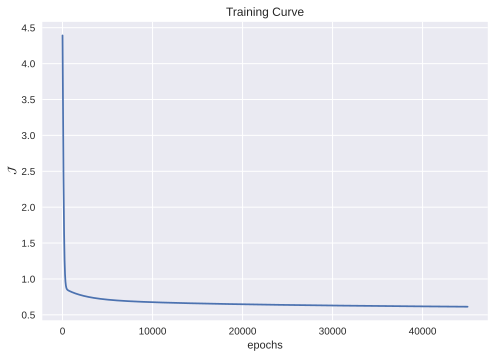

In [117]:
#cirrhosis=cirrhosis.dropna()
X=cirrhosis[['duration', 'status', 'drug', 'age', 'sex', 'ascites',
       'hepatomology', 'spiders', 'edema', 'bilirubin', 
       'albumin',  'phosphatase', 'SGOT', 'cholesterol', 'copper','triglicerides',
        'prothrombin', 'platelets']].to_numpy()
y=cirrhosis.stage.to_numpy()
model.fit(X, y,eta=1e-3,epochs=45000, show_curve=True)
y_hat=model.predict(X)
accuracy(y, y_hat)

In [104]:
model=MVLogisticRegression()

0.48717948717948717

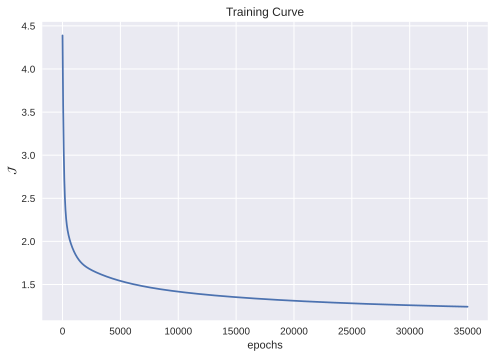

In [112]:
#cirrhosis=cirrhosis.dropna()
X=cirrhosis[['duration', 'status', 'drug', 'age', 'sex', 'ascites',
       'hepatomology', 'spiders', 'edema', 'bilirubin', 
       'albumin',  'phosphatase', 'SGOT', 'cholesterol', 'copper','triglicerides',
        'prothrombin', 'platelets' ]].to_numpy()
y=cirrhosis.stage.to_numpy()
model.fit(X, y,eta=1e-3,epochs=35000, show_curve=True)
y_hat=model.predict(X)
accuracy(y, y_hat)

In [106]:
class Shallow_ANN():

  def fit(self, X, y, neurons=10, eta=1e-3, epochs=1e3, show_curve=False):
    epochs= int(epochs)
    Y = one_hot_encode(y)

    N,D=X.shape

    K=Y.shape[1]

    self.W={l:np.random.randn(M[0], M[1]) for l , M in enumerate(zip([D, neurons], [neurons,K]),1 )}
    self.b={l:np.random.randn(M) for l , M in enumerate([neurons, K],1)}


    self.a={1:np.tanh, 2:softmax}

    J=np.zeros(epochs)

    for epoch in range(epochs):

      self.__forward__(X)
      J[epoch]=cross_entropy(Y, self.Z[2])

      #Weight Update rule:
      self.W[2]-=eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))

      #Bias update

      self.b[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
      self.b[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel('epochs')
        plt.ylabel("$\mathcal{J}$")
        plt.title('Training Curve')

  def __forward__(self, X):
    self.Z={0:X}

    for l in sorted(self.W.keys()):
      self.Z[l]=self.a[l](self.Z[l-1]@self.W[l]+self.b[l])

  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

In [107]:
X=cirrhosis[[ 'duration', 'status', 'drug', 'age', 'sex', 'ascites',
       'hepatomology', 'spiders', 'edema', 'bilirubin', 
       'albumin',  'phosphatase', 'SGOT', 'cholesterol', 'copper','triglicerides',
        'prothrombin', 'platelets' ]].to_numpy()

y=cirrhosis.stage

In [108]:
ann=Shallow_ANN()

In [110]:
cirrhosis.stage

0      3
1      2
2      3
3      3
4      2
      ..
307    1
308    1
309    1
310    1
311    1
Name: stage, Length: 312, dtype: int64

0.8397435897435898

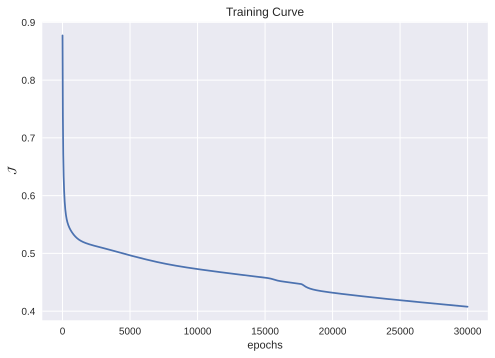

In [125]:
ann.fit(X,y,show_curve=True,epochs=3e4,neurons=5, eta=1e-2)
y_hat=ann.predict(X)
accuracy(y, y_hat)

# Logistic


In [113]:
cirrhosis.stage.value_counts()

2    120
3    109
1     67
0     16
Name: stage, dtype: int64

In [114]:
df=cirrhosis
df['stage'] = np.where(df['stage'] == 3,1,0)

0.782051282051282

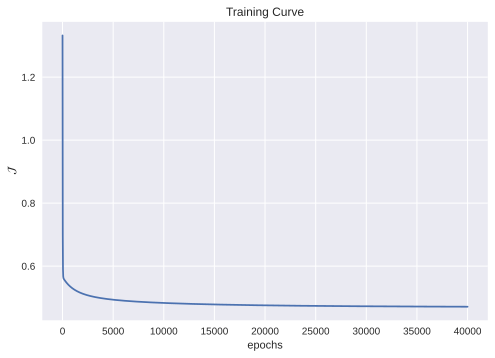

In [115]:
X2=df[[ 'drug', 'age', 'sex', 'ascites',
       'hepatomology', 'spiders','edema', 'albumin', 'phosphatase', ]].to_numpy()

y2=df.stage.to_numpy()
logistic_reg=SimpleLogisticRegression()
Weights=logistic_reg.fit(X2,y2,show_curve=True,epochs=4e4, eta=1e-2)
y_hat=logistic_reg.predict(X2)
accuracy(y2, y_hat)